<a href="https://colab.research.google.com/github/KingNam/Hongong_ml_dl/blob/main/4_1_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN을 활용하여 7개의 생선데이터를 분류하기

"주변 샘플 주위의 가장 가까운 이웃 샘플의 클래스를 확률로 삼는다"

In [ ]:
# Species: 종
# Weight: 무게
# Length: 길이
# Diagonal: 대각선 길이
# Height: 높이
# Width: 너비

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# 물고기 종류가 어떤 종류가 있는지 살펴보기
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# 데이터프레임에서 원하는 열을 선택하기
# 1. 칼럼의 이름을 입력하여 직접 선택하는 방식
fish[['Species','Weight','Height','Width']].head()

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


In [ ]:
# 2. iloc 를 활용하여 리스트 인덱싱, 슬라이싱으로 원하는 데이터를 가져오기
fish.iloc[2:4,2:4]

,Length,Diagonal
2,26.5,31.1
3,29.0,33.5


In [ ]:
# 3. loc를 활용하여 데이터 가져오기. 
fish.loc[[2,3],['Length','Diagonal']]

,Length,Diagonal
2,26.5,31.1
3,29.0,33.5


loc 와 iloc의 자세한 차이는 링크 참고
[loc vs iloc](https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79)

In [ ]:
# 타겟 데이터인 Species를 제외하고 나머지 열을 input 데이터로 설정하기
# 그리고 df 를 넘파이 array로 변환
#fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input = fish.iloc[:,1:].to_numpy()
#print(fish_input)

In [ ]:
# 타겟 데이터 만들기
fish_target = fish['Species'].to_numpy()
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [ ]:
# Seed를 42로 두고 train dataset과 test dataset으로 데이터를 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [ ]:
# 각 dataset을 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# KNN을 이용하여 클래스를 학습시키고 예측하기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
# 클래스 kn을 학습
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


# 다중 분류(Multi - Class classification)

위와 같이 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 **다중분류** 라고 한다.

방식은 이진분류와 같이 적절한 점수가 나올때까지 학습키고 예측하는 것과 같다. 사이킷런에서는 문자열로된 타깃값도 변환하지 않고 그대로 사용이 가능하다.

그러나, 타깃값을 그대로 모델에 전달하면 자동으로 알파벳 순으로 매겨진다.

차이는 아래와 같다.

In [ ]:
# 타깃 데이터에 들어있는 종의 순서
print(pd.unique(fish['Species']))
# 사이킷런에서 모델학습을 위해 전달한 데이터의 순서
print(kn.classes_)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


두 리스트의 나열순서는 다르다.

In [ ]:
# 테스트 데이터를 활용해 값을 예측해보기
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
# 위의 값이 어떻게 예측되었는지를 살펴보기 위해 계산된 확률표를 확인하기
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba,4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


이 값에서 가장 확률이 높은 것으로 예측한다

예를 들어, 첫번째 행에서는 Perch 열에서 1값을 보이므로 Perch라고 예측

네번째, 다섯번째 행에서는 Perch 값이 0.666.. 으로 가장 높은 확률을 보이므로 Perch 라고 예측

## 나의 궁금증 실험

n_neighbors = 3 이어서 예측이 좀 부정확하다고 생각이 들지 않을까? 

적어도 5개는 봐야되지 않을까? 모델 점수를 비교해보자

In [ ]:
# KNN을 이용하여 클래스를 학습시키고 예측하기
from sklearn.neighbors import KNeighborsClassifier
kn_n5 = KNeighborsClassifier(n_neighbors = 5)
# 클래스 kn을 학습
kn_n5.fit(train_scaled,train_target)
print(kn_n5.score(train_scaled, train_target))
print(kn_n5.score(test_scaled, test_target))

0.7983193277310925
0.85


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


n_neighbors 가 5인 경우에는 과소적합되었다.

그렇다면 10은?

In [ ]:
# KNN을 이용하여 클래스를 학습시키고 예측하기
from sklearn.neighbors import KNeighborsClassifier
kn_n10 = KNeighborsClassifier(n_neighbors = 10)
# 클래스 kn을 학습
kn_n10.fit(train_scaled,train_target)
print(kn_n10.score(train_scaled, train_target))
print(kn_n10.score(test_scaled, test_target))

0.7563025210084033
0.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


힌트가 되는 이웃수가 더 많아질수록 정확도가 떨어지고 과소적합되는 경향을 보인다.

직접 그래프를 그려 확인해보자

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was

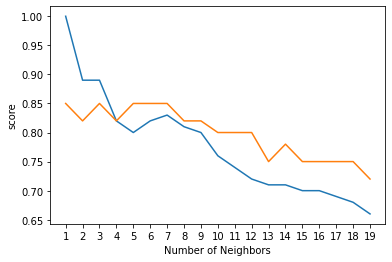

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

n_list = range(1,20)
for n in n_list:
  kn = KNeighborsClassifier(n_neighbors = n)
  kn.fit(train_scaled, train_target)
  train_score.append(kn.score(train_scaled, train_target))
  test_score.append(kn.score(test_scaled, test_target))

plt.plot(n_list, np.round(train_score,2))
plt.plot(n_list, np.round(test_score,2))
plt.xlabel('Number of Neighbors')
plt.xticks(np.arange(1,20))
plt.ylabel('score')
plt.show()

이웃수가 많아지면 예측 정확도가 떨어지고 과소적합되는것을 확인!

# 로지스틱 회귀 (Logisitic Regression)
 
지금의 문제를 로지스틱 회귀를 통해 풀어보자. 

(머신러닝은 다양한 모델을 활용 비교하여 성능이 좋은 모델을 선택해야 함)

로지스틱 회귀는 다음과 같은 선형 방정식을 학습한다

$z = a \times (Weight) + b \times (Length) + c \times (Diagonal) + d \times (Height) + e \times (Width) + f$

이 식에서 $z$는 어떤 값도 될 수 있다. 

그러나, $z$ 는 확률이기 때문에 $ 0~1$ 의 값이 되어야 한다. 

이 문제는 **시그모이드(sigmoid) 함수** 를 통해 해결이 가능하다.

## $\theta =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }$


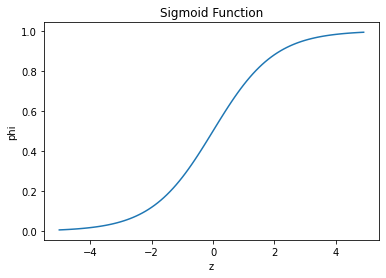

In [ ]:
# 시그모이드 함수 그리기
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.title('Sigmoid Function')
plt.show()

로지스틱 회귀 모델에서는 0.5를 기준으로 0.5 보다 크면 **양성 클래스**, 0.5 보다 작으면 **음성 클래스**로 분류한다.

### 로지스틱 회귀로 이진 분류 수행하기

In [ ]:
# train dataset에서 도미(Bream)와 빙어(Smelt)행 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
# 로지스틱 회귀 모델에 데이터 학습시키기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 모델 예측값과 확률 확인하기
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
# 음성 클래스와 양성 클래스 확인하기
# 음성: Bream / 양성: Smelt
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
# 학습된 로지스틱 회귀 모델의 계수 확인
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


위의 계수를 통해 정리하면 아래의 식과 같다.

$z = -0.404 \times (Weight) - 0.576 \times (Length) - 0.663 \times (Diagonal) - 1.013 \times (Height) - 0.732 \times (Width) - 2.161$

In [ ]:
# 위의 식을 활용해 z값 계산하기
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# z값을 활용하여 확률 계산해보기
# 1. expit를 활용하여 계산
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
# 2. 수식을 직접 이용하여 계산하기
# phi = 1 / (1 + np.exp(-z))
prob_z = []
for i in range(5):
 prob_z.append(1/(1+np.exp(-decisions[i])))

print(prob_z)

[0.0024014518780479588, 0.9726481722467774, 0.005139283545591795, 0.014157979296024102, 0.0023273110833360515]


### 로지스틱 회귀로 다중분류 하기

LogisitcRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다.

max_iter의 default는 100.

또, 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제한다. 

이런 규제를 L2 규제라고도 하는데, 릿지 회귀에서는 $\alpha$ 값을 조절해 규제의 양을 조절했으나 LogisitcRegression에서는 $C$ 값으로 규제를 조절한다.

$C$ 값이 작을수록 규제가 커진다.

In [ ]:
# L2 규제를 완화하고, 반복수를 1000으로 늘린 모델을 학습시키고 정확도 계산
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
# 테스트데이터로 예측해보기
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
# 테스트데이터 예측 확률 보기
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# lr 클래스 정보 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 다중분류 모델의 계수를 직접확인하고 크기 출력
print(lr.coef_, lr.intercept_)
print(lr.coef_.shape, lr.intercept_.shape)

[[-1.49002911 -1.02919221  2.59351113  7.70354318 -1.20068079]
 [ 0.19619256 -2.0106062  -3.77982687  6.50490143 -1.99486463]
 [ 3.56278472  6.34361428 -8.48973364 -5.75756295  3.79309039]
 [-0.10458533  3.60316654  3.93067417 -3.61731229 -1.75070607]
 [-1.40059104 -6.07505264  5.25967743 -0.87222909  1.86043657]
 [-1.38528628  1.49217379  1.3922839  -5.67732641 -4.40095877]
 [ 0.62151448 -2.32410356 -0.90658611  1.71598614  3.69368329]] [-0.09204845 -0.26290731  3.25101057 -0.14742485  2.65496057 -6.78780765
  1.38421712]
(7, 5) (7,)


coef_ 배열의 행과 열은 각각 7개 5개이고

intercept_의 배열도 행은 7개.

다중분류에서는 시그모이드 함수가 아닌 **소프트맥스(softmax)** 함수를 사용해 7 개의 $z$값을 확률로 변환한다.

### 소프트맥스 함수란??

시그모이드 함수는 **하나**의 선형방정식의 출력값을 0~1 사이 값으로 출력함.

소프트맥스 함수는 **여러개**의 선형방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만든다.

이를 위해 지수함수를 사용하기 때문에 **정규화된 지수 함수** 라고도 한다.



소프트맥스 함수 정의하기

1) 먼저 7개의 z값의 이름을 z1에서 z7 까지 붙인다.

2) $z1$ ~ $z7$ 까지의 값을 사용해 지수 함수 $e^{z1}$ ~ $e^{z7}$ 을 계싼해 모두 더한다.

3) 이를 $e$_$sum$이라고 한다.

> $e$_$sum$ $= e^{z1}+e^{z2}+e^{z3}+e^{z4}+e^{z5}+e^{z6}+e^{z7}$

4) 그 다음 $e^{z1}$ ~ $e^{z7}$ 을 $e$_$sum$ 으로 나누어 준다.

> $s1 =  \frac{e^{z1}}{e\_sum}$, $s2 =  \frac{e^{z2}}{e\_sum}$, $\cdots$, $s7 =  \frac{e^{z7}}{e\_sum}$ 

5) $s1$ 에서 $s7$ 까지 모두 더하면 분자와 분모가 같아지므로 1이 된다.

In [ ]:
# decision_function() 메서드로 z1~ z7 값을 구한다음 소프트맥스 함수를 사용해 바꿔보자
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
# scipy 패키지에서 softmax 함수를 제공함.
# softmax() 함수의 axis를 1로 지정하여 각 행, 각 샘픔에 대한 소프트맥스 값을 계산
# 지정해주지 않은 경우, 배열 전체에 대한 소프트맥스를 계산함
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
